In [1]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import traceback
import numpy as np
import matplotlib.patches as patches
import sys
sys.path.append('../..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from config.saps.datasets import DATASETS_CLASSIFICATION, DATASETS_REGRESSION
from util import DATASET_PATH
from viz import *
import viz
RESULTS_PATH = oj(os.path.dirname(DATASET_PATH), 'results')

print('num_datasets', len(DATASETS_CLASSIFICATION), len(DATASETS_REGRESSION))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

num_datasets 11 9


In [47]:
# run comparison aggregations
!python3 "../../02_aggregate_comparisons.py"

(null): can't open file '../../02_aggregate_comparisons.py': [Errno 2] No such file or directory


# overarching plots

In [60]:
def make_comparison_grid(metric='rocauc', num_dsets=7, datasets=DATASETS_CLASSIFICATION,
                    models_to_include=['SAPS', 'CART'], save_name='fig'):
    R, C = ceil(num_dsets / 3), 3
    plt.figure(figsize=(3 * C, 2.5 * R), facecolor='w')
    
    COLORS = {
        'SAPS': 'black',
        'CART': 'orange', # cp,
        'Rulefit': 'green',
        'C45': cb,
        'CART_(MSE)': 'orange',
        'CART_(MAE)': cp,
        'SAPS_(Reweighted)': cg,
        'SAPS_(Include_Linear)': cb,
        'Random_Forest': cg,
        'Gradient_Boosting': cb,
    }
    
    for i, dset in enumerate(tqdm(datasets[::-1][:num_dsets])):
        # try:
        dset_name = dset[0]
#         try:
        ax = plt.subplot(R, C, i + 1)
        pkl_file = oj(RESULTS_PATH, 'reg_data', dset_name, 'train-test/combined.pkl')
        df = pkl.load(open(pkl_file, 'rb'))['df']
        df['model'] = df.index
        for _, (name, g) in enumerate(df.groupby('model')):
            if name in models_to_include:
                x = g[f'{dset_name}_complexity']
                args = np.argsort(x)
#                 if i % C == C - 1:
#                     for cutoff in args:
#                         if args[cutoff] >= 20:
#                             break
#                     args = args[:cutoff - 1]
                alpha = 1.0 if 'SAPS' == name else 0.35
                lw = 2 if 'SAPS' == name else 1.5
                kwargs = dict(color=COLORS[name], alpha=alpha, lw=lw)
#                 print(g.keys())
                x = x[args].values # args #
                y = g[f'{dset_name}_{metric}_test'][args].values
                # print('x', x)
                # print('y', y)
                plt.plot(np.log10(x),
                         y, '.-', **kwargs,
                         label=name.replace('_', ' ').replace('C45', 'C4.5')) #, zorder=-5)
    #             plt.plot(g[f'{dset_name}_complexity'][args], g[f'{dset_name}_{metric}_train'][args], '.--', **kwargs,
    #                      label=name + ' (Train)')
                plt.xlabel('Log Number of rules')
                # plt.xlim((0, 20))
                plt.ylabel(dset_name.capitalize().replace('-', ' ') + ' ' + metric.upper().replace('ROC', '').replace('R2', '$R^2$'))
                # plt.xscale('log')
        if i % C == C - 1:
            # rect = patches.Rectangle((18, 0), 100, 1, linewidth=1, edgecolor='w', facecolor='w', zorder=-4)
            dvu.line_legend(fontsize=10, xoffset_spacing=0.1, adjust_text_labels=True)
            # ax.add_patch(rect)
            pass
        # except:
        #     print('skipping', dset_name)
        #     traceback.print_exc()
    viz.savefig(save_name)

100%|██████████| 11/11 [00:02<00:00,  3.92it/s]


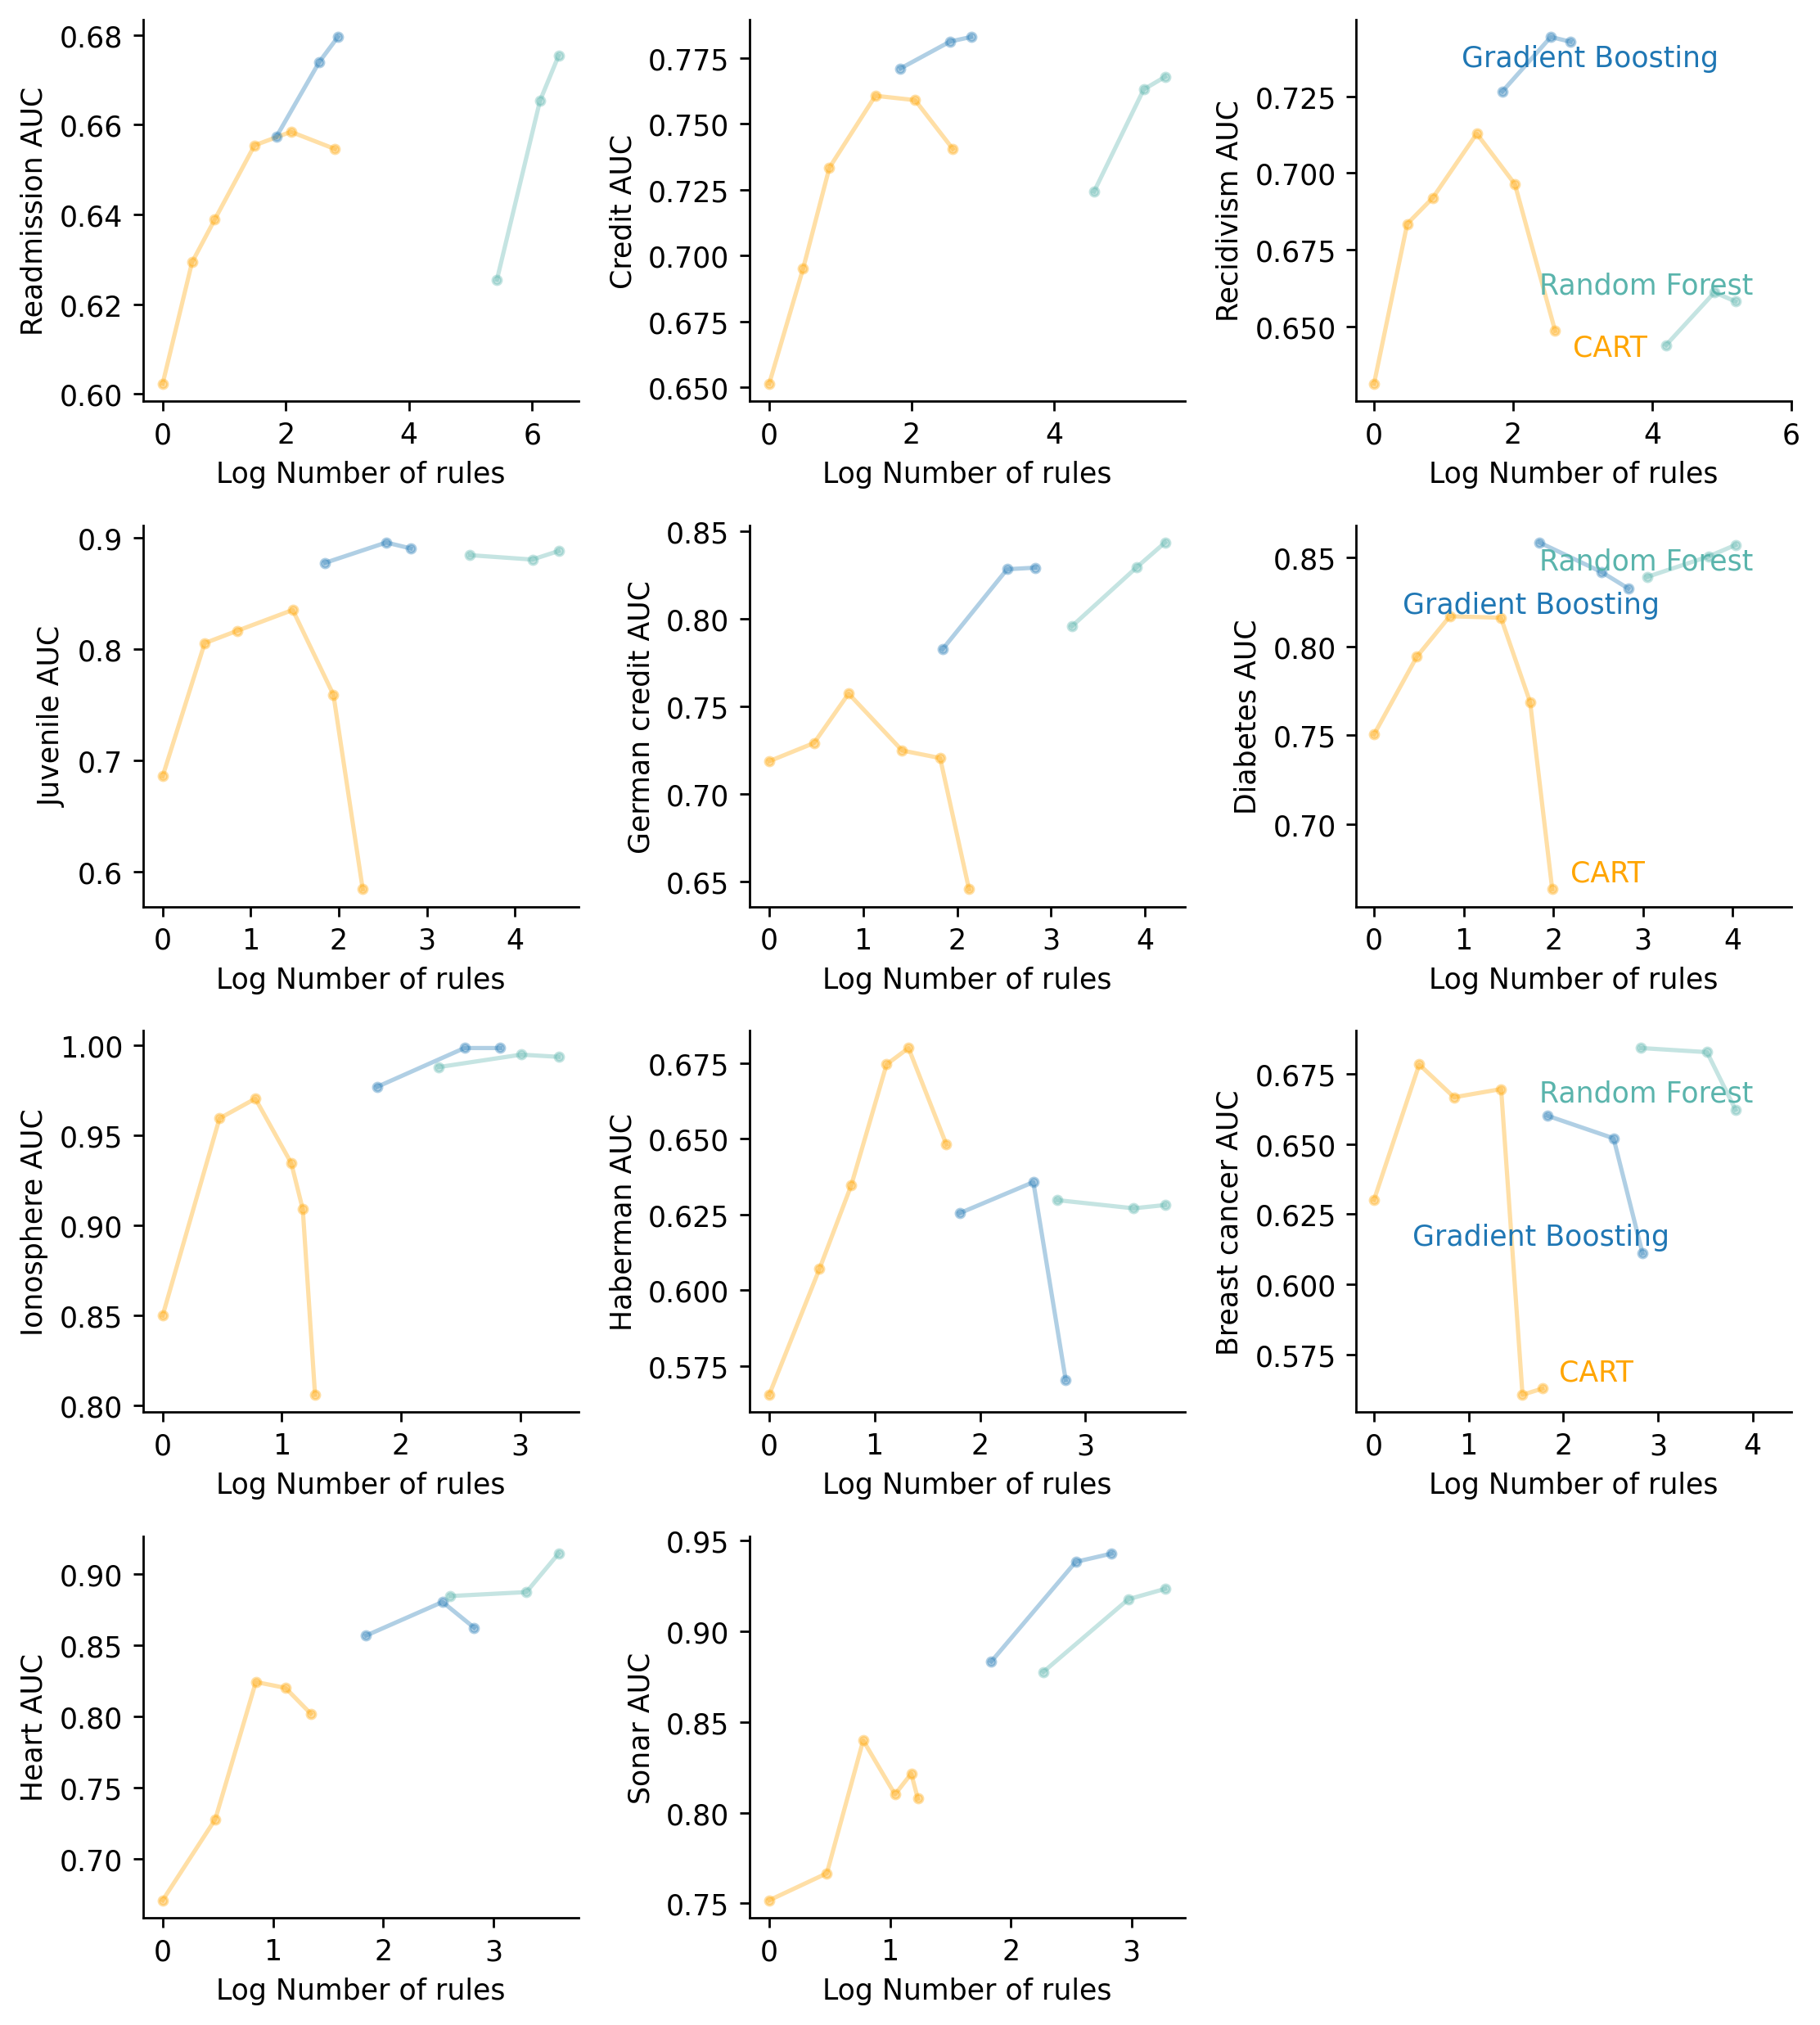

In [61]:
make_comparison_grid(metric='rocauc', num_dsets=len(DATASETS_CLASSIFICATION), datasets=DATASETS_CLASSIFICATION,
                models_to_include=['CART', 'Random_Forest', 'Gradient_Boosting'],
                save_name='shrinkage-classification')

100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


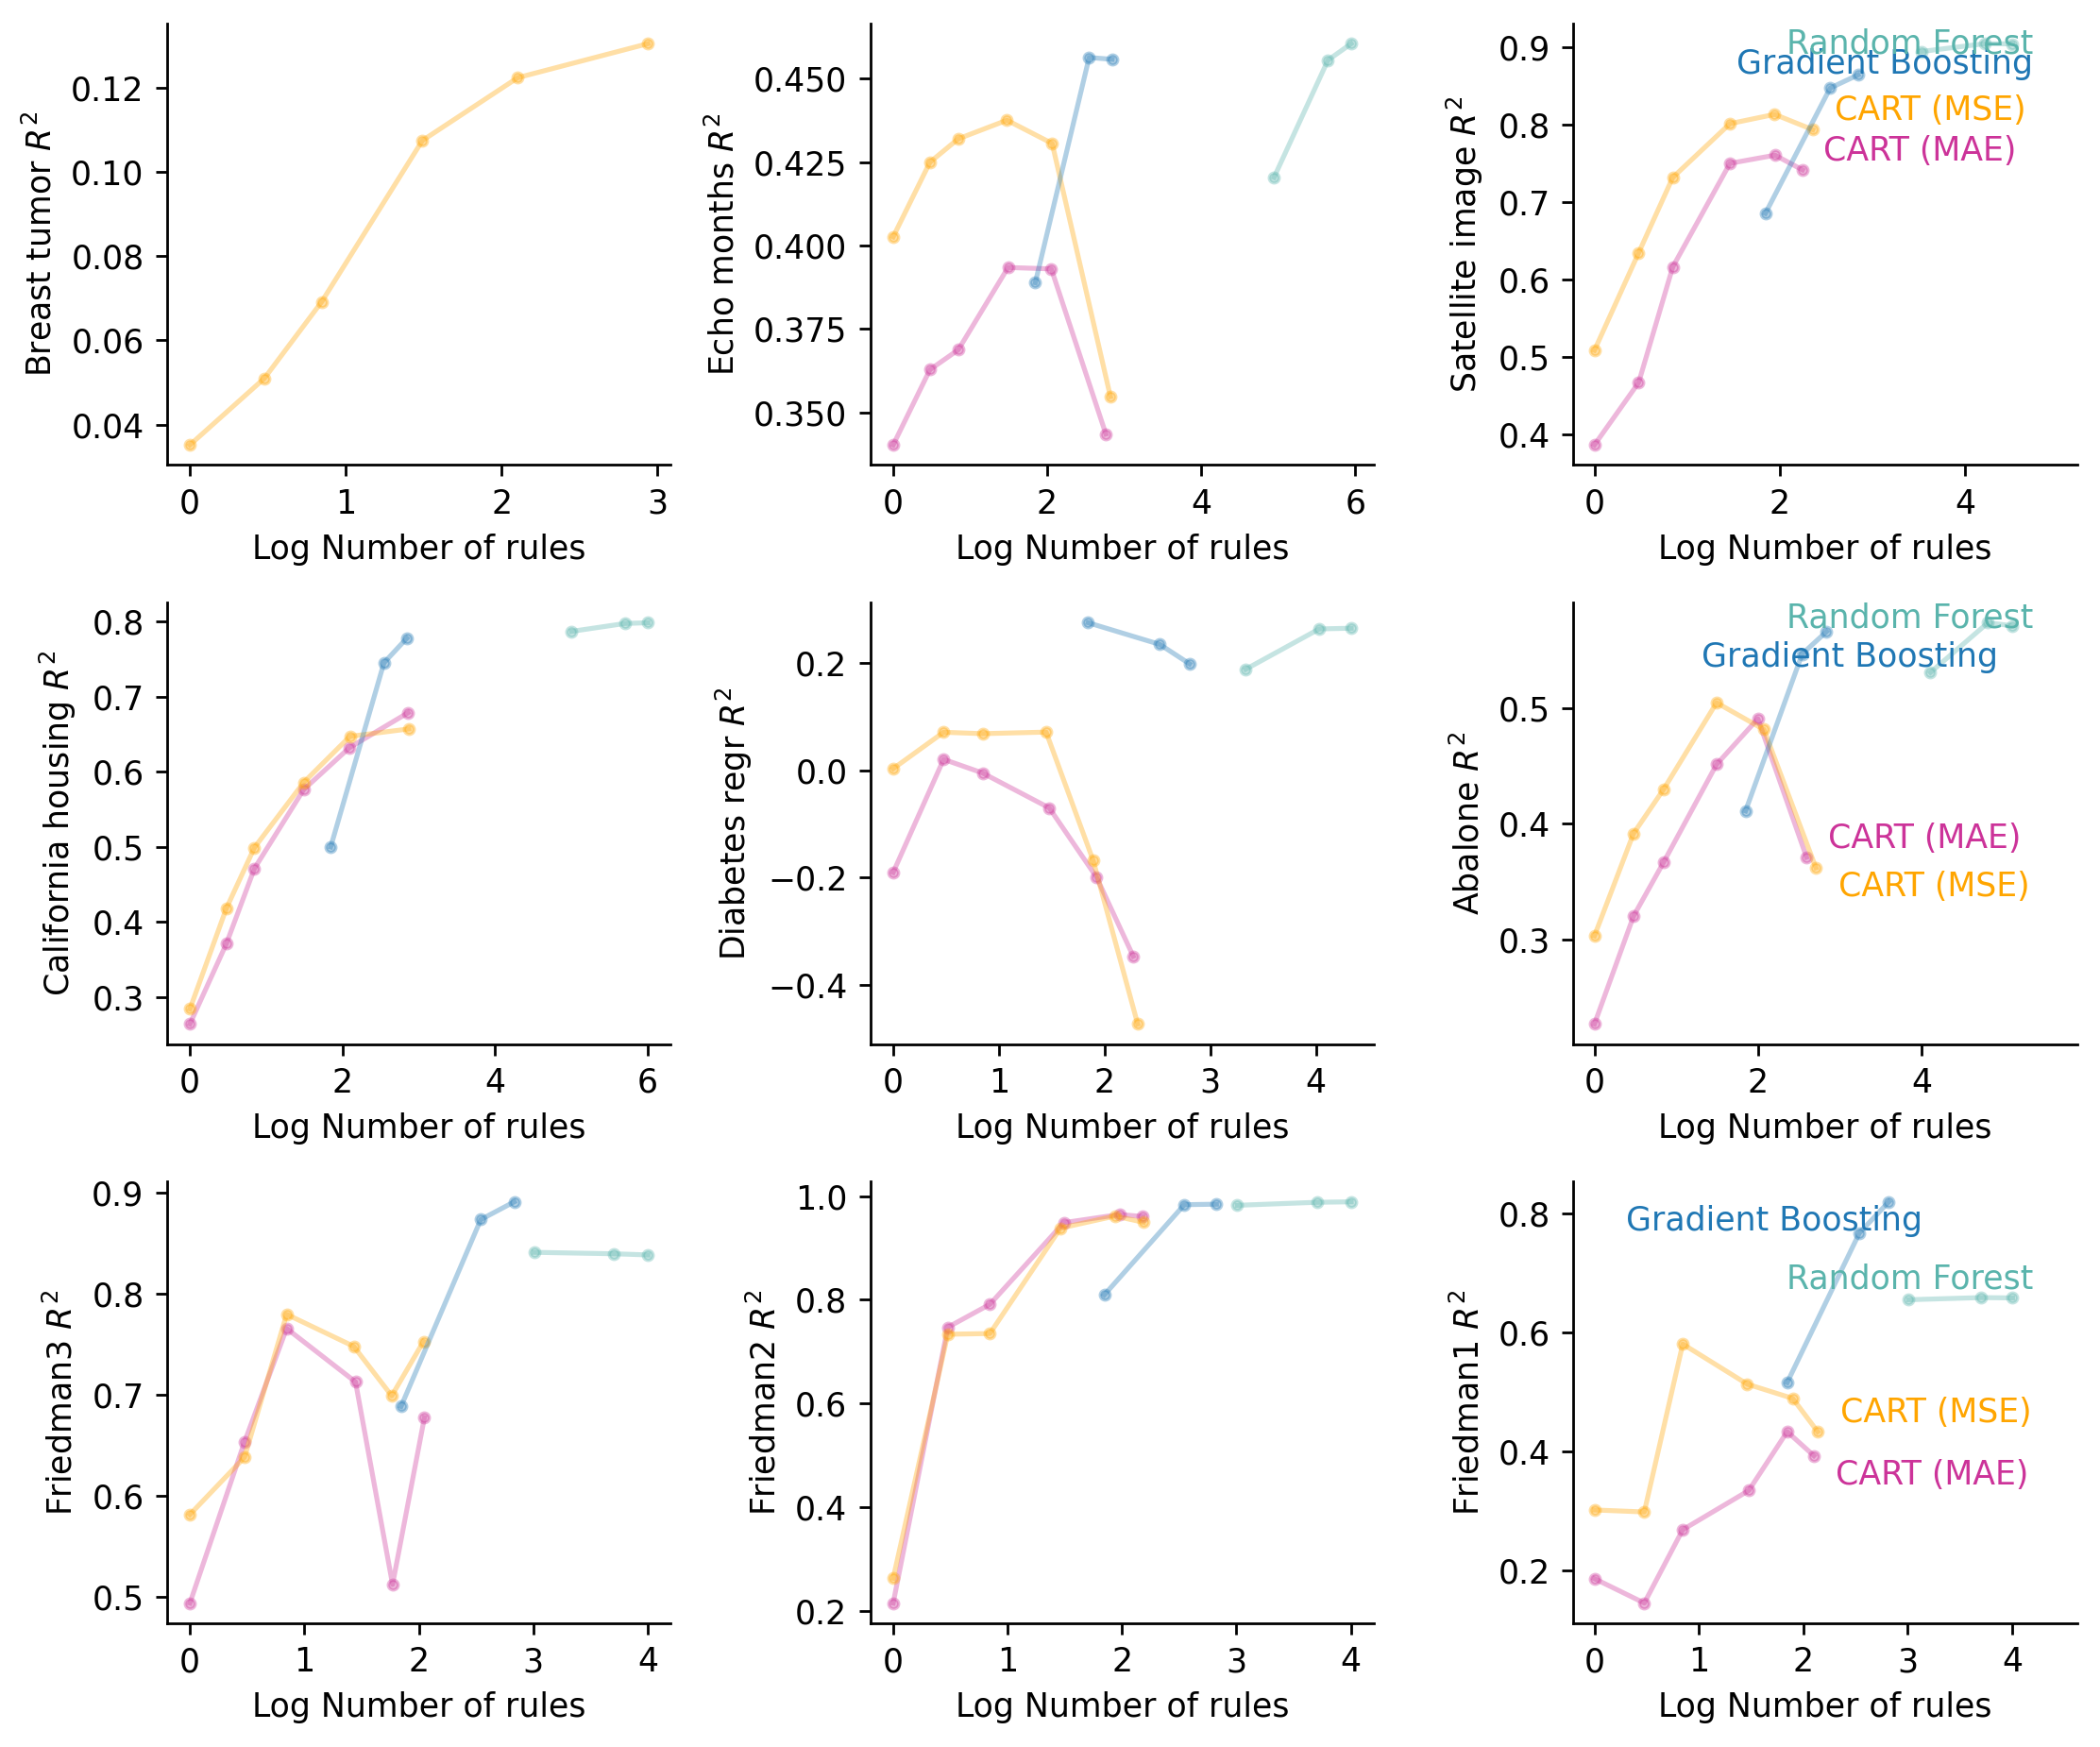

In [62]:
make_comparison_grid(metric='r2', num_dsets=9, datasets=DATASETS_REGRESSION, # len(DATASETS_REGRESSION)
                models_to_include=['CART_(MSE)', 'CART_(MAE)', 'Random_Forest', 'Gradient_Boosting'],
                save_name='shrinkage-regression')

